# Corvallis

In [48]:
import polars as pl
from plotnine import *
from datetime import date
from calendar import month_name, month_abbr
from IPython.display import Markdown

In [ ]:
this_month = date(2025, 5, 1)
highlight_color = "#FF5733" 

In [50]:
tmean_oregon = pl.read_csv("data/tmean-oregon.csv", schema_overrides={"date": pl.Date})
tmean = tmean_oregon.filter(
    pl.col("city") == "Corvallis",
)

In [51]:
tmean.head()

city,date,tmean,month,year,tmean_normal,tmean_diff,tmean_direction
str,date,f64,i64,i64,f64,f64,str
"""Corvallis""",2025-05-01,13.276,5,2025,13.3488,0.0728,"""cooler"""
"""Corvallis""",2025-04-01,11.3902,4,2025,10.0785,1.3117,"""warmer"""
"""Corvallis""",2025-03-01,9.00345,3,2025,8.0295,0.97395,"""warmer"""
"""Corvallis""",2025-02-01,4.99405,2,2025,6.1965,1.20245,"""cooler"""
"""Corvallis""",2025-01-01,3.70495,1,2025,5.0605,1.35555,"""cooler"""


In [52]:
this = tmean.filter(pl.col("date") == this_month).row(0, named=True)
Markdown(f"{month_name[this['month']]} {this['year']} was {abs(this['tmean_diff']):.1f}°C {this['tmean_direction']} than usual.")


May 2025 was 0.1°C cooler than usual.

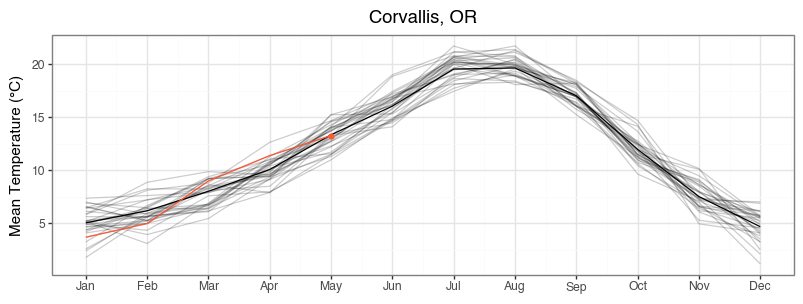

In [ ]:
(
    ggplot(tmean, aes(x="month", y="tmean"))
    + geom_line(aes(group="year"), alpha=0.2)
    + geom_line(aes(y = "tmean_normal"))
    + geom_line(data=tmean.filter(pl.col("year") == 2025), color=highlight_color)
    + geom_point(
        data=tmean.filter(pl.col("date") == this_month), color=highlight_color
    )
    + scale_x_continuous(breaks=list(range(1, 13)), labels=list(month_abbr[1:]))
    + labs(title = "Corvallis, OR", x="", y="Mean Temperature (°C)")
    + theme_bw() 
    + theme(figure_size = (8, 4))
)